<a href="https://colab.research.google.com/github/AnnLivio/Automatidata/blob/main/Automatidata_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the Automatidata project
La comisión de Taxi y Limusina de New York busca una manera de utilizar los datos recolectados en el área de la ciudad para predecir el monto de la tarifa de los viajes en taxi.
Esta es una etapa inicial del proyecto. Para obtener información clara, se deben analizar los datos de la Comisión, identificar las variables clave y asegurarse de que el conjunto de datos esté listo para el análisis.

*The New York City Taxi and Limousine Commission seeks a way to utilize the data collected from the New York City area to predict the fare amount for taxi cab rides. This is an early stages of the project. To get clear insights, New York TLC's data must be analyzed, key variables identified, and the dataset ensured it is ready for analysis.*


### Data Dictionary

|Column name |Description |
|---|---|
| ID | Trip identification number |
| VendorID | 1= Creative Mobile Technologies, LLC; </br>2= VeriFone Inc.|
| tpep_pickup_datetime |The date and time when the meter was engaged. |
|tpep_dropoff_datetime | The date and time when the meter was disengaged. |
|Passenger_count |The number of passengers in the vehicle. </br> This is a driver-entered value.|
|Trip_distance |The elapsed trip distance in miles reported by the taximeter.|
|PULocationID |TLC Taxi Zone in which the taximeter was engaged|
|DOLocationID |TLC Taxi Zone in which the taximeter was disengaged|
|RateCodeID |The final rate code in effect at the end of the trip.<br><br>1 = Standard rate <br> 2 = JFK <br>3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride|
|Store_and_fwd_flag | Y = store and forward trip <br>N = not a store and forward trip|
|Payment_type | 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip|
|Fare_amount |The time-and-distance fare calculated by the meter.|
|Extra | Extras and surcharges, this only includes the 0.50 and 1 rush hour and overnight charges.|
|MTA_tax| 0.50 MTA tax that is automatically triggered based on the metered rate in use.|
|Improvement_surcharge |0.30 improvement surcharge assessed trips at the flag drop.|
|Tip_amount | This field is automatically populated for credit card tips. Cash tips are not included.|
|Tolls_amount |Total amount of all tolls paid in trip. |
|Total_amount |The total amount charged to passengers. Does not include cash tips.|

In [ ]:
# Import libraries and packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Automatidata/automatidata_clean.csv")


## **Regression Analysis:** Simplify complex data relationships

It's time to work on predicting the taxi fare amounts.

Multiple linear regression helps to estimate the linear relationship between one continuous dependent variable and two or more independent variables. This opens the door for much more thorough and flexible analysis to be completed.


## Analize

1.   Outliers and extreme data values can significantly impact linear regression equations. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.

2.   EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with data set means, medians, and other similar methods.

3.   It's important to check for things like multicollinearity between predictor variables, as well to understand their distributions, as this will help you decide what statistical inferences can be made from the model and which ones cannot.

4.  Additionally, it can be useful to engineer new features by multiplying variables together or taking the difference from one variable to another. For example, in this dataset you can create a `duration` variable by subtracting `tpep_dropoff` from `tpep_pickup time`.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22698 entries, 0 to 22697
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22698 non-null  int64  
 1   tpep_pickup_datetime   22698 non-null  object 
 2   tpep_dropoff_datetime  22698 non-null  object 
 3   passenger_count        22698 non-null  int64  
 4   trip_distance          22698 non-null  float64
 5   RatecodeID             22698 non-null  int64  
 6   store_and_fwd_flag     22698 non-null  object 
 7   PULocationID           22698 non-null  int64  
 8   DOLocationID           22698 non-null  int64  
 9   payment_type           22698 non-null  int64  
 10  fare_amount            22698 non-null  float64
 11  extra                  22698 non-null  float64
 12  mta_tax                22698 non-null  float64
 13  tip_amount             22698 non-null  float64
 14  tolls_amount           22698 non-null  float64
 15  im

In [ ]:
# Descriptive stats about the data
data.describe(include='all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22698.000000,22698,22698,22698.000000,22698.000000,22698.000000,22698,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000
unique,NaN,22686,22687,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2017-04-16 17:54:18,2017-11-15 11:20:56,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,2,NaN,NaN,NaN,22599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.556260,NaN,NaN,1.642391,2.913441,1.039078,NaN,162.407877,161.523482,1.336902,13.023802,0.333289,0.497445,1.835862,0.312555,0.299551,16.307784
std,0.496836,NaN,NaN,1.285213,3.653200,0.281169,NaN,66.631429,70.137938,0.496217,13.237230,0.463101,0.039466,2.800661,1.399241,0.015673,16.092441
min,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


In [ ]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

## **Step 3:** Hypothesis testing / Test de Hipótesis

### New column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [ ]:
# Create column "duration"
data['duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime'])/ np.timedelta64(1,'m')


In [ ]:
data.duration.head()

,duration
0,14.066667
1,26.500000
2,7.200000
3,30.250000
4,16.716667


## Check Outliers
### **Box plots**
Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

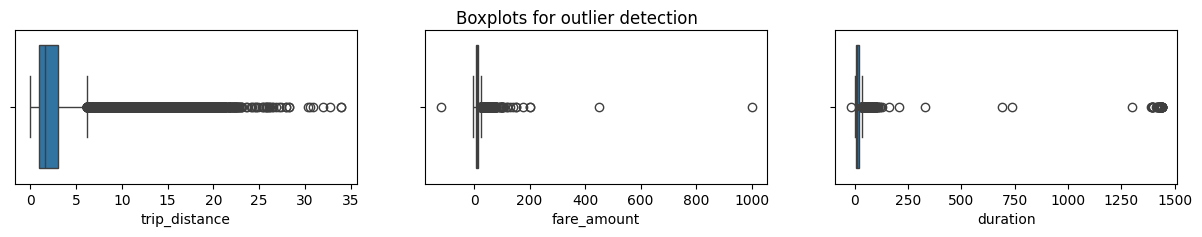

In [ ]:
# Box plot for trip_distance, fare_amount and duration
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=data['trip_distance'])
sns.boxplot(ax=axes[1], x=data['fare_amount'])
sns.boxplot(ax=axes[2], x=data['duration'])
plt.show();

**Notes:**
1. All three variables contain outliers. Some are extreme, but others not so much.

2. It's 30 miles from the southern tip of Staten Island to the northern end of Manhattan and that's in a straight line. With this knowledge and the distribution of the values in this column, it's reasonable to leave these values alone and not alter them. However, the values for `fare_amount` and `duration` definitely seem to have problematic outliers on the higher end.

## **Imputations**

## `trip_distance` outliers

We know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

In [ ]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(data['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

It might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

In [ ]:
# Calculate count of rides where the trip_distance is zero
data.query('trip_distance == 0').shape

(147, 18)

**Note:** 148 out of ~23,000 rides is relatively insignificant. You could impute it with a value of 0.01, but it's unlikely to have much of an effect on the model. Therefore, the `trip_distance` column will remain untouched with regard to outliers.

## `fare_amount` outliers

In [ ]:
data['fare_amount'].describe()

,fare_amount
count,22698.000000
mean,13.023802
std,13.237230
min,-120.000000
25%,6.500000
50%,9.500000
75%,14.500000
max,999.990000


**Notes:**

The range of values in the `fare_amount` column is large and the extremes don't make much sense.

* Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

* The maximum fare amount in this dataset is nearly \\$1,000, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquartile range (IQR) is \\$8. The standard formula of `Q3 + (1.5 * IQR)` yields \$26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of `6`, which results in a cap of $62.50.

In [ ]:
# Impute values less than $0 with `0`
data.loc[data['fare_amount'] < 0, 'fare_amount'] = 0
data['fare_amount'].min()

0.0

In [ ]:
def outlier_imputer(col_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    col_list: A list of columns to iterate over
    iqr_factor: A number representing x in the formula:
                  Q3 + (x * IQR). Used to determine maximum threshold, beyond which a point is considered an outlier.

    The IQR is computed for each column in col_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in col_list:
        # Reassign minimum to zero
        data.loc[data[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        data.loc[data[col] > upper_threshold, col] = upper_threshold
        print(data[col].describe(), "\n")


In [ ]:
# Impute the outliers with a factor of 6
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22698.000000
mean        12.895727
std         10.536226
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64 



## `duration` outliers

In [ ]:
data['duration'].describe()

,duration
count,22698.000000
mean,17.014526
std,61.997745
min,-16.983333
25%,6.650000
50%,11.183333
75%,18.383333
max,1439.550000


**Notes:**

* **Low values:** There should be no negative values. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [ ]:
# Impute negative values
data.loc[data['duration'] < 0, 'duration'] = 0
data['duration'].min()


0.0

In [ ]:
# Impute high values
outlier_imputer(['duration'], 6)


duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22698.000000
mean        14.461192
std         11.946920
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64 



## Feature Engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

Create a column `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.


In [ ]:
# Create a column pickup_dropoff
data['pickup_dropoff'] = data['PULocationID'].astype(str) + ' ' + data['DOLocationID'].astype(str)
data['pickup_dropoff'].head()


,pickup_dropoff
0,100 231
1,186 43
2,262 236
3,188 97
4,4 112


Group each row by the `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column.

In [ ]:
groups_mean = data.groupby('pickup_dropoff')['trip_distance'].mean()
groups_mean[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [ ]:
# 1. Convert `groups_mean` to a dictionary
grouped_dict = groups_mean.to_dict()


When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [ ]:
data['mean_distance'] = data['pickup_dropoff'].map(grouped_dict)

In [ ]:
groups_mean_dur = data.groupby('pickup_dropoff')['duration'].mean()
groups_mean_dur[:5]

,duration
pickup_dropoff,
1 1,0.466667
10 148,69.366667
100 1,48.183333
100 100,3.130556
100 107,11.200000


In [ ]:
# 1. Convert `groups_mean` to a dictionary
grouped_dict = groups_mean_dur.to_dict()

data['mean_duration'] = data['pickup_dropoff'].map(grouped_dict)

In [ ]:
# Confirm that it worked
data.query('PULocationID ==100 & DOLocationID == 231')[['mean_distance', 'mean_duration']]

,mean_distance,mean_duration
0,3.521667,22.847222
4909,3.521667,22.847222
16635,3.521667,22.847222
18133,3.521667,22.847222
19760,3.521667,22.847222
20580,3.521667,22.847222


### Create a `day` and `month` column

In [ ]:
data['day'] = data['tpep_pickup_datetime'].dt.day_name()
data['month'] = data['tpep_pickup_datetime'].dt.month_name()

### Create a `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00-10:00 or from 16:00-20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [ ]:
data['rush_hour'] = data['tpep_pickup_datetime'].dt.hour

# Impute 0 if 'day' is Saturday or Sunday
data.loc[data['day'].isin(['Saturday', 'Sunday']), 'rush_hour'] = 0


In [ ]:
def rush_imputer(hour):
  if hour['rush_hour'] in range(6,11) or hour['rush_hour'] in range(16,21):
    return 1
  else:
    return 0


In [ ]:
# Impute 0
data.loc[(data.day != 'Saturday') & (data.day !='Sunday'), 'rush_hour'] = data.apply(rush_imputer, axis=1)

<ipython-input-56-737452893ff8>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0 1 1 ... 1 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  data.loc[(data.day != 'Saturday') & (data.day !='Sunday'), 'rush_hour'] = data.apply(rush_imputer, axis=1)


In [ ]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,day,month,rush_hour
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,...,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,Saturday,March,0
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,...,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,Tuesday,April,0
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,...,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,Friday,December,1
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,...,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,Sunday,May,0
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,...,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,Saturday,April,0


<Axes: xlabel='mean_duration', ylabel='fare_amount'>

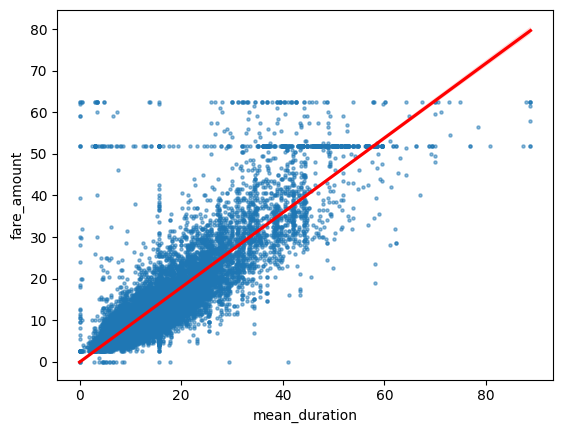

In [ ]:
sns.regplot(y='fare_amount', x='mean_duration',
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'}, data=data)

The `mean_duration` variable correlates with the target variable. But there are a horizontal lines around fare amounts of 50 and 60ish dollars.

One of the lines represents the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

In [ ]:
data.query('fare_amount > 50')['fare_amount'].value_counts().head()

,count
fare_amount,
52.0,514
62.5,83
59.0,9
50.5,9
57.5,8


In [ ]:
pd.set_option('display.max_columns', None)
data.query('fare_amount == 52').head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,day,month,rush_hour
11,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,Sunday,March,0
110,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,Saturday,June,0
161,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,Saturday,November,0
247,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,Wednesday,December,0
379,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,Sunday,September,0
388,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,Tuesday,February,1
406,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,Monday,June,0
449,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,Thursday,August,0
468,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,Tuesday,September,0
520,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,Sunday,April,0


**Notes:**

It seems that almost all of the trips in the first 30 rows where the fare amount was \$52 either begin or end at location 132, and all of them have a `RatecodeID` of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of $5.76 and \\$5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.


The data dictionary says that `RatecodeID` of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for "new york city taxi flat rate \$52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because `RatecodeID` is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way you know that those data points will always be correct.

## Isolate modeling variables

In [ ]:
data_copy = data.copy()

In [ ]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'duration', 'pickup_dropoff', 'mean_distance', 'day',
       'month', 'rush_hour', 'mean_duration'],
      dtype='object')

In [ ]:
data_copy = data_copy.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag',     'PULocationID', 'DOLocationID', 'payment_type', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration', 'pickup_dropoff', 'day',
       'month'])
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22698 entries, 0 to 22697
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22698 non-null  int64  
 1   passenger_count  22698 non-null  int64  
 2   fare_amount      22698 non-null  float64
 3   mean_distance    22698 non-null  float64
 4   rush_hour        22698 non-null  int64  
 5   mean_duration    22698 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


## Pairplot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

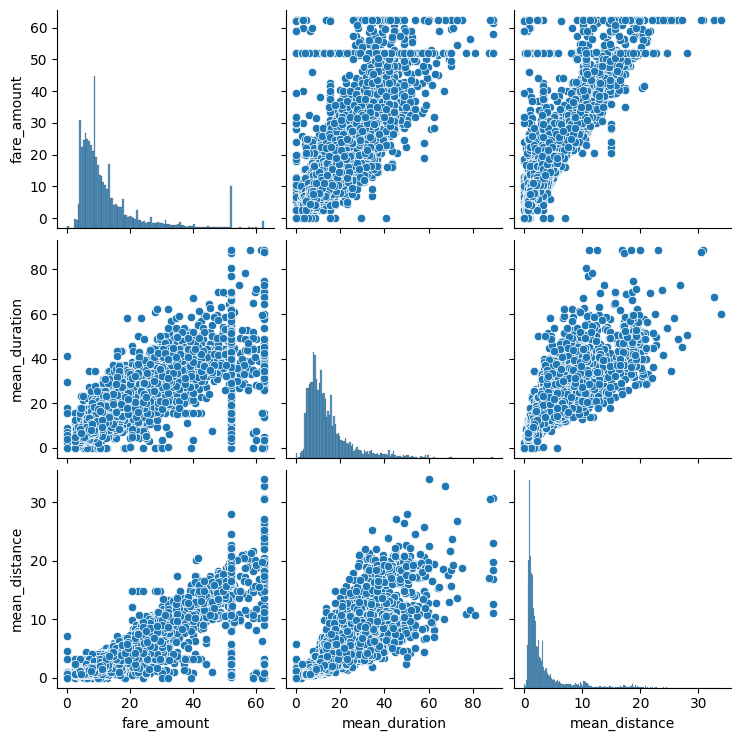

In [ ]:
sns.pairplot(data_copy, vars=['fare_amount', 'mean_duration', 'mean_distance'])

## Identify correlations


In [ ]:
# Create correlation matrix using pearson correlation coefficient
data_copy.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,rush_hour,mean_duration
VendorID,1.000000,0.266417,0.001278,0.004727,-0.000688,0.001851
passenger_count,0.266417,1.000000,0.015215,0.013431,-0.024212,0.015857
fare_amount,0.001278,0.015215,1.000000,0.910612,-0.026183,0.859497
mean_distance,0.004727,0.013431,0.910612,1.000000,-0.046798,0.874864
rush_hour,-0.000688,-0.024212,-0.026183,-0.046798,1.000000,-0.027503
mean_duration,0.001851,0.015857,0.859497,0.874864,-0.027503,1.000000


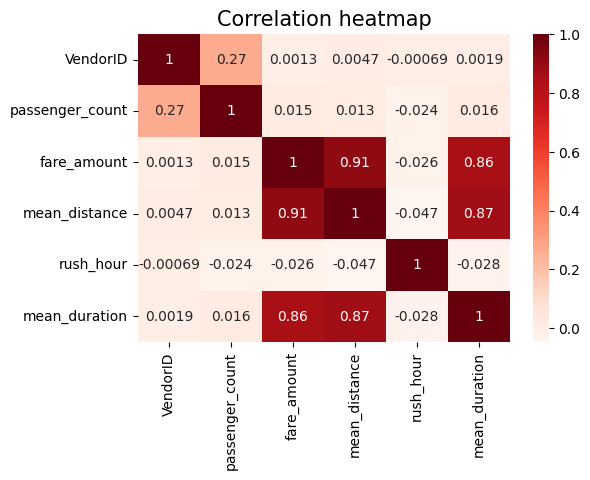

In [ ]:
# Create correlation heatmap

plt.figure(figsize=(6,4))
sns.heatmap(data_copy.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=15)
plt.show()

**Notes:**
`mean_duration` and `mean_distance` are highly correlated with the target `fare_amount`. They're also both correlated with each other, with a Pearson correlation of 0.87.

**Important Note**

Highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict `fare_amount`, which will be used as a predictor variable in machine learning models. Therefore, try modeling with both variables even though they are correlated.

## Save data for later

In [ ]:
# Save data
data_copy.to_csv("/content/drive/MyDrive/Colab Notebooks/Automatidata/automatidata_formodel.csv")

## Split data

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [ ]:
# Remove target
X = data_copy.drop(columns=['fare_amount'])

# Set y with target
y = data_copy['fare_amount']

X.head()

,VendorID,passenger_count,mean_distance,rush_hour,mean_duration
0,2,6,3.521667,0,22.847222
1,1,1,3.108889,0,24.470370
2,1,1,0.881429,1,7.250000
3,2,1,3.700000,0,30.250000
4,2,1,4.435000,0,14.616667


### Preprocess data

In [ ]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,rush_hour,mean_duration,VendorID_2
0,6,3.521667,0,22.847222,True
1,1,3.108889,0,24.470370,False
2,1,0.881429,1,7.250000,False
3,1,3.700000,0,30.250000,True
4,1,4.435000,0,14.616667,True


### Split data into training and test sets

In [ ]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [ ]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50194827  0.87196338 -0.77148286  0.17626931  0.88873349]
 [-0.50194827 -0.60116752  1.29620508 -0.69856659  0.88873349]
 [ 0.2728861  -0.47905202 -0.77148286 -0.57323627 -1.12519671]
 ...
 [-0.50194827 -0.45190626 -0.77148286 -0.67915411 -1.12519671]
 [-0.50194827 -0.59047657  1.29620508 -0.85777461 -1.12519671]
 [ 1.82255483  0.83915443 -0.77148286  1.13263183  0.88873349]]


In [ ]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Evaluate the model performance on the training data

r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8450542813284705
R^2: 0.8450542813284705
MAE: 2.166872015842371
MSE: 17.175377115452292
RMSE: 4.144318655153377


## Test data

In [ ]:
# Scale the X_test data

X_test_scaled = scaler.transform(X_test)

In [ ]:
# Evaluate the model performance on the testing data

r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8507757913183221
R^2: 0.8507757913183221
MAE: 2.190463999345706
MSE: 16.659067804830556
RMSE: 4.081552131828106


**Notes:** The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

For the test data, an R<sup>2</sup> of 0.868 means that 86.8% of the variance in the `fare_amount` variable is described by the model.

The mean absolute error is informative here because, for the purposes of the model, an error of two is not more than twice as bad as an error of one.

El projecto continua en Automatidata_04.ipynb